### Using Factor analysis to identify similar POIs
#### Factor may identify POIs that have a similar linear distribution. Thus, we can reduce the number of POIs to use MAchine Learning techniques. 

In [60]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import IPython.display

In [93]:
poi = pd.read_csv('../data/boston/training-sets/poi/proportional-poi-10x10.csv')
poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 101 entries, i to zoo
dtypes: float64(98), int64(3)
memory usage: 157.9 KB


In [94]:
poi.drop(['i','j','placement_id'],axis=1,inplace=True)

#### Verifying the adequacy of POI data before applying Factor analysis

In [95]:
# adequacy test
#Bartlett's test, if p-value < 0.05 the matrix is not an identity matrix and can be used with FA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square, p_value = calculate_bartlett_sphericity(poi)
chi_square, p_value

(36362.63905251037, 0.0)

In [96]:
#Kaiser-Meyer-Olkin (KMO)
#suitability of data for FA: kmo > 0.6 is adequate for FA
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(poi)
kmo_model

/home/higor/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.880090294014035

### Choosing the number of factors
- Scree plot is used to suggest the different number of factor a dataset has. This is done choose the tilt-shift point in the chart

In [85]:
#using Kaiser criterion and scree plot to choose the number of factors
#the number of factor is equal to the number of eigenvalues greater than 1 
fa = FactorAnalyzer(rotation='varimax',n_factors=4)
num_columns = len(poi.columns)
fa.fit(poi)
#fa.analyze(poi,num_columns,rotation=None)
#eigenvalues, variance = fa.get_eigenvalues()
#eigenvalues

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [86]:
eigenvalues, variance = fa.get_eigenvalues()
eigenvalues

array([3.07870326e+01, 5.99448477e+00, 4.16249522e+00, 3.45748633e+00,
       2.84218874e+00, 2.46166515e+00, 2.17773649e+00, 2.04681673e+00,
       1.81846236e+00, 1.75594835e+00, 1.60851186e+00, 1.57379439e+00,
       1.53843102e+00, 1.43696938e+00, 1.38218842e+00, 1.27739098e+00,
       1.22682560e+00, 1.22048699e+00, 1.18844274e+00, 1.14641132e+00,
       1.09478407e+00, 1.04609495e+00, 1.04058952e+00, 9.52518179e-01,
       9.15259392e-01, 9.03507739e-01, 8.72465867e-01, 8.53734853e-01,
       8.10696532e-01, 7.94121059e-01, 7.71932630e-01, 7.44019061e-01,
       7.28177740e-01, 6.97591349e-01, 6.82570017e-01, 6.53094789e-01,
       6.32991167e-01, 6.03720575e-01, 5.74131718e-01, 5.25461743e-01,
       5.11574804e-01, 4.90177838e-01, 4.72841971e-01, 4.40970931e-01,
       4.29296525e-01, 4.23687810e-01, 4.20144219e-01, 3.95310642e-01,
       3.87265761e-01, 3.68623657e-01, 3.57988906e-01, 3.47469723e-01,
       3.20314235e-01, 3.01767686e-01, 2.89220809e-01, 2.81920428e-01,
      

#### Scree plot
- POI data seems to have 4 factors

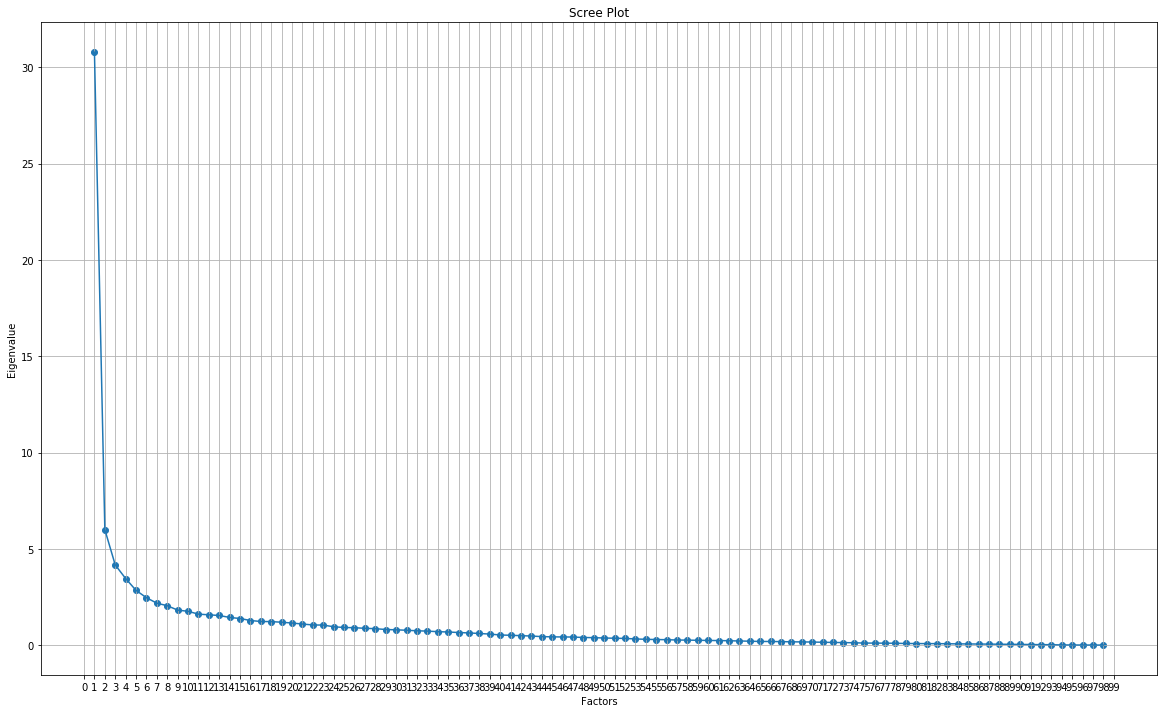

In [87]:
plt.figure(figsize=(20,12))
plt.xticks(range(0,100))
plt.scatter(range(1,poi.shape[1]+1),eigenvalues)
plt.plot(range(1,poi.shape[1]+1),eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [88]:
fa.loadings_

array([[ 0.37961175,  0.29436405,  0.46644572,  0.20139636],
       [ 0.24426941,  0.34614192,  0.64733823,  0.19635129],
       [ 0.10289809,  0.30679553,  0.58727954,  0.12467567],
       [ 0.23704233,  0.77347471,  0.20172944,  0.19631789],
       [ 0.48925545,  0.79253193,  0.19170676,  0.14751317],
       [ 0.30300078,  0.14192628,  0.78002148,  0.17016346],
       [ 0.46689296,  0.33649536,  0.39263459,  0.29152578],
       [ 0.0024487 ,  0.05338839,  0.0022082 ,  0.04629012],
       [ 0.16666523,  0.90226606,  0.01682305,  0.01581935],
       [ 0.2194592 ,  0.11893327,  0.58378818,  0.21288393],
       [ 0.07225941, -0.02487576,  0.63949909,  0.10935781],
       [ 0.19097087, -0.07798279,  0.4264597 ,  0.60798833],
       [ 0.5216666 ,  0.33819369, -0.02485734,  0.29108328],
       [ 0.53824188,  0.30299125,  0.12701596,  0.53179299],
       [ 0.71809771,  0.43800147,  0.24662659,  0.45723304],
       [ 0.50294141,  0.41764672,  0.14289422,  0.54717405],
       [ 0.07608784,  0.

#### Grouping POI types per factor

In [89]:
factor_loadings = fa.loadings_
len(factor_loadings)

98

In [90]:
num_factors = len(factor_loadings[0])
factors = []
values = []
threshold = 0.4
for fl in factor_loadings:
    max_value = fl[0]
    factor_index = 1
    for idx, value in enumerate(fl):
        if value > max_value:
            max_value = value
            factor_index = idx+1
    if max_value >= threshold:
        factors.append(factor_index)
        values.append(max_value)
    else:
        factors.append(num_factors+1)
        values.append(0)
poi_list = poi.columns.tolist()
result = pd.DataFrame({'poi':poi_list,'factor':factors,'value':values})
result.head()

poi  factor     value
0     dentist       3  0.466446
1      health       3  0.647338
2      doctor       3  0.587280
3  accounting       2  0.773475
4     finance       2  0.792532

In [91]:
result.sort_values(['factor','value'],ascending=[True,False],inplace=True)
result.reset_index(inplace=True)
IPython.display.HTML(result.to_html())

#### Saving factor loading for POIs

In [92]:
result.to_csv('poi_factor_loadings-20x20.csv')